In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data/weights_heights.csv', index_col='Index')

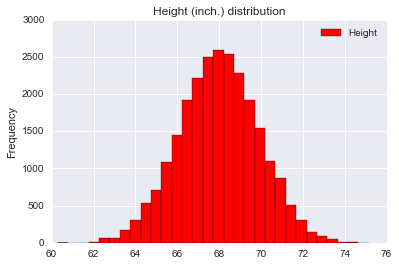

In [3]:
data.plot(y='Height', kind='hist', color='red',  title='Height (inch.) distribution', bins=30)
plt.show()

In [4]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [5]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], row['Weight']), axis=1)

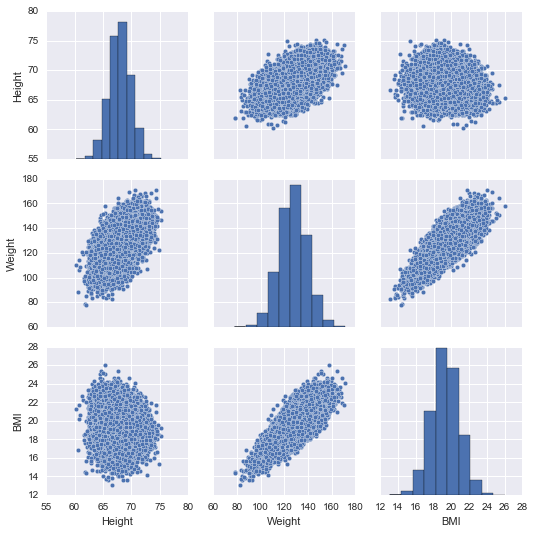

In [6]:
sns.pairplot(data)
plt.show()

In [7]:
def error(w0, w1):
    y = data['Height'].as_matrix()
    x = data['Weight'].as_matrix()
    q = y - (w1 * x + w0)
    return np.sum(q * q)

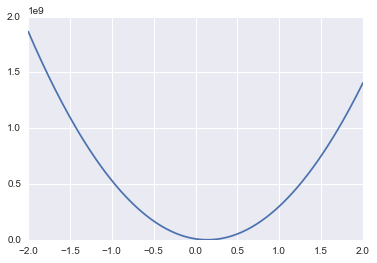

In [8]:
x = np.linspace(-2.0, 2.0, 200)
plt.plot(x, map(lambda x: error(50.0, x), x))
plt.show()

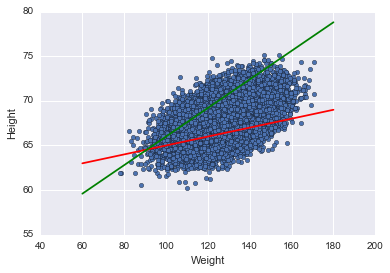

In [9]:
lin_x = np.linspace(60, 180, 120)
data.plot(x='Weight', y='Height', kind='scatter')
plt.plot(lin_x, 0.05 * lin_x + 60.0, color='red')
plt.plot(lin_x, 0.16 * lin_x + 50.0, color='green')
plt.show()

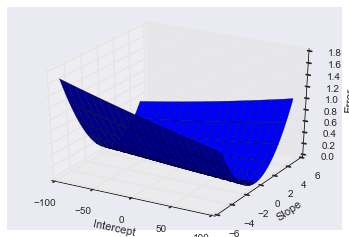

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
W0 = np.arange(-100.0, 100.0, 1.0)
W1 = np.arange(-5.0, 5.0, 0.1)
W0, W1 = np.meshgrid(W0, W1)

func = np.vectorize(error)
Z = func(W0, W1)

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(W0, W1, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

In [12]:
import mpl_toolkits
mpl_toolkits.__version__

AttributeError: 'module' object has no attribute '__version__'

In [14]:
import matplotlib as mpl
mpl.__version__

'1.5.1'